In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

#### Reading Data

In [105]:
# Reading data
df = pd.read_csv('../data/raw/data_individual_challenge.csv', sep=";")
print('Total number of rows:', df.shape[0])
print('Total number of columns:', df.shape[1])
df.head()

Total number of rows: 1035
Total number of columns: 9


,Date,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility
0,2000-01-03,0.6281,633.00000,0.6235,0.6272,NaN,NaN,NaN,NaN
1,2000-01-10,0.6271,629.00000,0.6181,0.6197,NaN,NaN,NaN,NaN
2,2000-01-17,0.6200,0.62250,0.6072,609.0000,NaN,NaN,NaN,NaN
3,2000-01-24,0.6091,0.61271,599.0000,0.6027,NaN,NaN,NaN,NaN
4,2000-01-31,0.6021,0.62670,598.0000,0.6158,NaN,NaN,NaN,NaN


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1035 non-null   object 
 1   Open        1035 non-null   float64
 2   High        1035 non-null   float64
 3   Low         1035 non-null   float64
 4   Close       1035 non-null   float64
 5   rsi         1021 non-null   float64
 6   ema_fast    1022 non-null   float64
 7   ema_slow    994 non-null    float64
 8   volatility  1021 non-null   float64
dtypes: float64(8), object(1)
memory usage: 72.9+ KB


In [107]:
columns = ['Open', 'High', 'Low', 'Close', 'rsi', 'ema_fast', 'ema_slow', 'volatility']

### Data Analaysis

#### Check Missing Values

In [108]:
df.isnull().sum()

Date           0
Open           0
High           0
Low            0
Close          0
rsi           14
ema_fast      13
ema_slow      41
volatility    14
dtype: int64

As can be expected, the ema_fast and ema_slow values are NAN for the first weeks. By definition, the ema_fast depends on the average of 14 weeks, which leads to have the first 13 rows without values. The same happens with the ema_slow variable, that in this case it refers to the average of 42 weeks.

<AxesSubplot:>

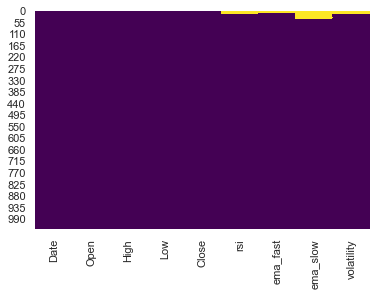

In [109]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [110]:
# Check last date a row contains a missing value
df['Date'][df['ema_slow'].isnull()].iloc[-1]

'2000-10-09'

In [111]:
# Check that if I start analysing the dataset from the 2000-10-09, there won't be missing values
df.iloc[41:,:].isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
rsi           0
ema_fast      0
ema_slow      0
volatility    0
dtype: int64

All rows that contain missing values are at the beggining of the dataset and consecutively. By deleting them there is no significant variation for the rest of the dataset and we could start analysing the dataset from the '2000-10-09'.

In [112]:
df = df.iloc[41:,:]

#### Outliers

In [113]:
columns = ['Open', 'High', 'Low', 'Close', 'rsi', 'ema_fast', 'ema_slow', 'volatility']

In [114]:
# Visualizing Open, High, Low and Close variables 
fig = make_subplots(rows=4, cols=1)
fig.add_trace(go.Box(x=df["Open"], fillcolor='rgba(93, 164, 214, 0.5)', name="Open"), row=1, col=1)
fig.add_trace(go.Box(x=df["High"], fillcolor='rgba(255, 144, 14, 0.5)', name="High"), row=2, col=1)
fig.add_trace(go.Box(x=df["Low"], fillcolor='rgba(44, 160, 101, 0.5)', name="Low"),row=3, col=1)
fig.add_trace(go.Box(x=df["Close"], fillcolor='rgba(93, 164, 214, 0.5)', name="Close"), row=4, col=1)

As can be seen from the previous figure, the variables Open, High, Low and Close are mostly between 0-1. However, they contain some outliers above 550. To deal with that huge numbers I will proceed to divide them by 1000 as it seems that the commas of these number have been forgotten.

In [115]:
# Transforming outliers from Open, High, Low and Close variables 
for col in columns[0:4]:
    df[col][df[col] > 550] = df[col][df[col] > 550]/1000

In [116]:
# Visualizing Open, High, Low and Close variables after outlier transformation
fig = make_subplots(rows=4, cols=1)
fig.add_trace(go.Box(x=df["Open"], fillcolor='rgba(93, 164, 214, 0.5)', name="Open"), row=1, col=1)
fig.add_trace(go.Box(x=df["High"], fillcolor='rgba(255, 144, 14, 0.5)', name="High"), row=2, col=1)
fig.add_trace(go.Box(x=df["Low"], fillcolor='rgba(44, 160, 101, 0.5)', name="Low"),row=3, col=1)
fig.add_trace(go.Box(x=df["Close"], fillcolor='rgba(93, 164, 214, 0.5)', name="Close"), row=4, col=1)

After recalculating the outliers, there are still some outliers values for the High and Low variables. However, it could be expected as are variables that define extreme values.

In [117]:
df[df['Low'] < 0.01]

,Date,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility
428,2008-03-17,0.78,0.7908,0.0066,0.7783,73.540231,0.752443,0.722109,8.835696


In [118]:
df.iloc[380:390]

,Date,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility
421,2008-01-28,0.7393,0.7542,0.7393,0.7530,70.501788,0.730007,0.705835,1.844786
422,2008-02-04,0.7531,0.7540,0.7413,0.7462,65.628762,0.732166,0.707713,1.850195
423,2008-02-11,0.7461,0.7506,0.7402,0.7490,66.650916,0.734411,0.709633,1.810795
424,2008-02-18,0.7491,0.7580,0.7477,0.7533,68.214239,0.736929,0.711664,1.769520
425,2008-02-25,0.7533,0.7673,0.7514,0.7659,72.310329,0.740792,0.714187,1.764379
426,2008-03-03,0.7658,0.7690,0.7601,0.7623,69.552507,0.743660,0.716424,1.729484
427,2008-03-10,0.7621,0.7804,0.7595,0.7797,74.595691,0.748465,0.719368,1.761576
428,2008-03-17,0.7800,0.7908,0.0066,0.7783,73.540231,0.752443,0.722109,8.835696
429,2008-03-24,0.7783,0.7929,0.7747,0.7920,76.973674,0.757717,0.725359,8.226794
430,2008-03-31,0.7920,0.7976,0.7824,0.7890,74.688175,0.761888,0.728319,7.805818


In [119]:
# Visualizing rsi, ema_fast, ema_slow and volatility variables 
fig = make_subplots(rows=4, cols=1)

fig.add_trace(go.Box(x=df["rsi"], fillcolor='rgba(93, 164, 214, 0.5)', name="rsi"), row=1, col=1)
fig.add_trace(go.Box(x=df["ema_fast"], fillcolor='rgba(255, 144, 14, 0.5)', name="ema_fast"), row=2, col=1)
fig.add_trace(go.Box(x=df["ema_slow"], fillcolor='rgba(44, 160, 101, 0.5)', name="ema_slow"), row=3, col=1)
fig.add_trace(go.Box(x=df["volatility"], fillcolor='rgba(93, 164, 214, 0.5)', name="volatility"), row=4, col=1)

The boxplots above shows that there are no strange values for each variable although there are large values for volatility. It shows that has been epochs that there were higher changes but it is not necessary any outlier transformation.

#### Matrix Correlation

<AxesSubplot:>

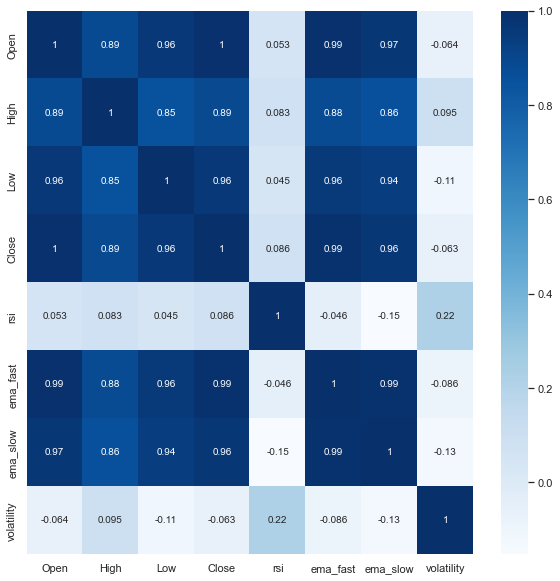

In [120]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

The previous plot shows the correlation matrix of the dataset. In other words, it displays the correlation among all pairs of variables. In general, the variables are highly positive correlated to the others. If we see in more detail, the volatility and the rsi are not correlated with any of them. 

Positive Correlations (ordered decreasingly):
- Open -> Close, ema_fast, ema_slow, Low, High
- High -> Close, Open, ema_fast, ema_slow, Low
- Low -> Open, Close, ema_fast, ema_slow, High
- Close -> Open, ema_fast, ema_slow, Low. High
- ema_fast -> ema_slow, Close Open, Low, High
- ema_slow ->

#### Scatter Plots

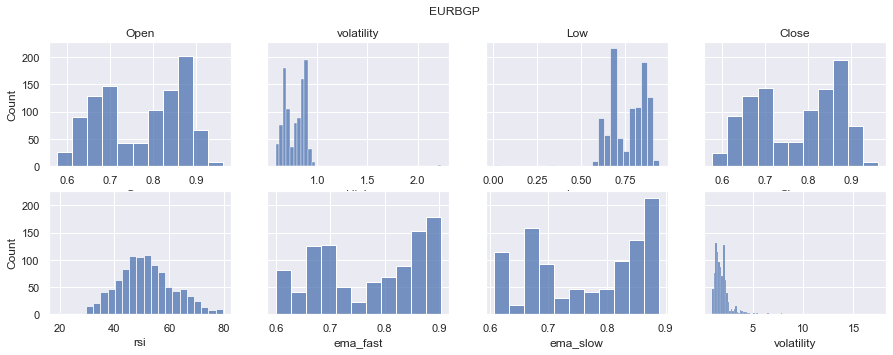

In [121]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5), sharey=True)
fig.suptitle('EURBGP')

for i in range(4):
    sns.histplot(ax=axes[0,i], x=df[columns[i]])
    axes[0,i].set_title(columns[i])
    sns.histplot(ax=axes[1,i], x=df[columns[i+4]])
    axes[0,1].set_title(columns[4+i])


### Time Series Analysis

In [122]:
# Dataset group weekly
df_w = df.set_index('Date')

In [123]:
# To analyse data I will group data by year instead of week
df_h = df
for i in range(0, len(df_h)):
    year = pd.to_datetime(df_h.Date.iloc[i]).year
    #month = pd.to_datetime(df.Date.iloc[i]).month
    #date = str(year)+'-'+str(month)
    df_h.Date.iloc[i] = str(year)

/Users/clararoviranoelle/Library/Python/3.8/lib/python/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [124]:
df_h = df_h.groupby('Date').agg({
    "Open": 'mean',
    "High": 'mean',
    "Low": 'mean',
    "Close": 'mean',
    "rsi": 'mean',
    "ema_fast": 'mean',
    "ema_slow": 'mean',
    "volatility": 'mean'
})

#### Line Plot

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

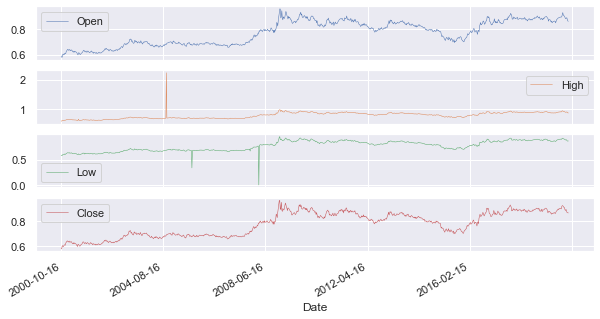

In [125]:
sns.set(rc={'figure.figsize':(10, 5)})
# Line graphic 
df_w[df_w.columns[0:4]].plot(linewidth=0.5, subplots=True)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

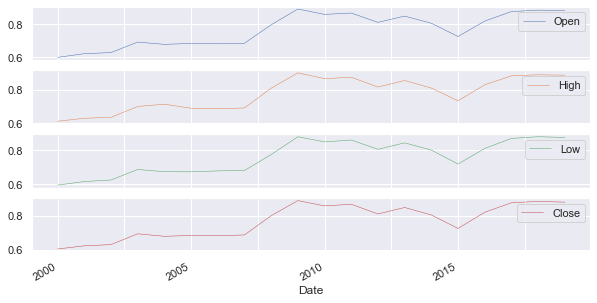

In [126]:
sns.set(rc={'figure.figsize':(10, 5)})
# Line graphic 
df_h[df_h.columns[0:4]].plot(linewidth=0.5, subplots=True)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

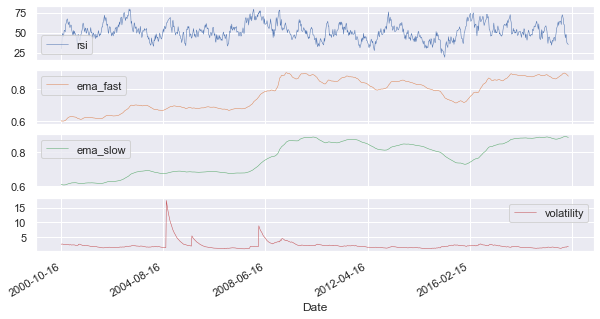

In [127]:
sns.set(rc={'figure.figsize':(10, 5)})
# Line graphic 
df_w[df_w.columns[4:]].plot(linewidth=0.5, subplots=True)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

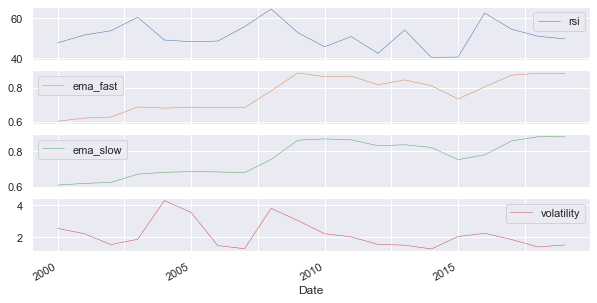

In [128]:
sns.set(rc={'figure.figsize':(10, 5)})
# Line graphic 
df_h[df_h.columns[4:]].plot(linewidth=0.5, subplots=True)

There were three increasings: 2004-09-27, 2005-09-12, 2008-03-17

### Graphics

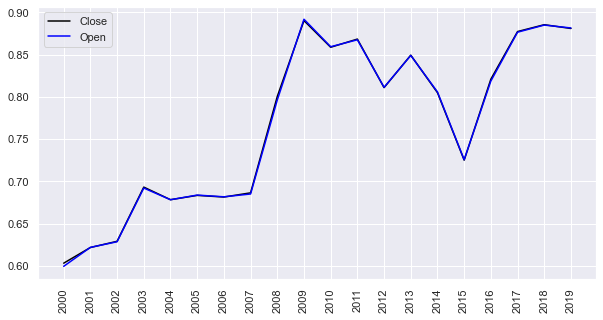

In [129]:
# plot lines
data = df_h
fig, ax = plt.subplots()
ax.plot(data['Close'], color = "black", label = "Close", linestyle="-")
ax.plot(data['Open'], color = "blue", label = "Open", linestyle="-")
plt.xticks(data.index, rotation=90)
ax.legend()
#fig.autofmt_xdate()

No handles with labels found to put in legend.


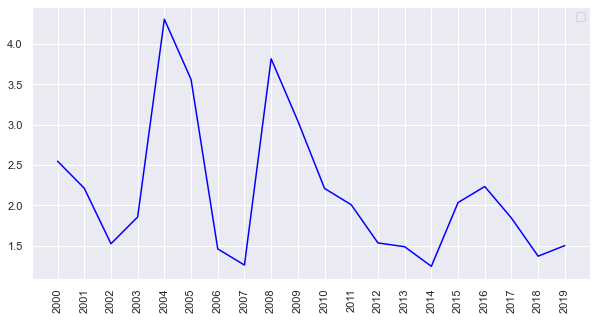

In [130]:
data = df_h
fig, ax = plt.subplots()
ax.plot(data['volatility'], color = "blue", linestyle="-")
#ax.plot(data['Open'], color = "green", label = "Open", linestyle="-")
plt.xticks(data.index, rotation=90)
ax.legend()

array([<AxesSubplot:xlabel='Date'>], dtype=object)

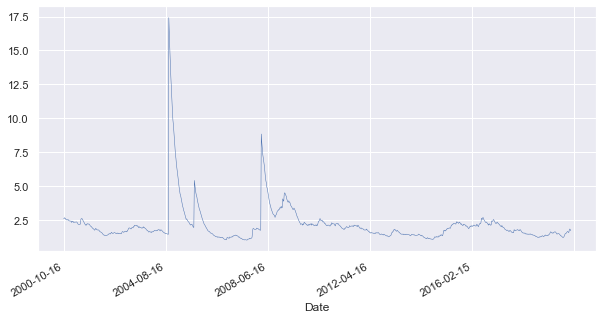

In [131]:
sns.set(rc={'figure.figsize':(10, 5)})
# Line graphic 
df_w[df_w.columns[-1]].plot(linewidth=0.5, subplots=True)